In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df=pd.read_csv("Amazon Sale Report.csv")
df.head()

C:\Users\yuvraj\AppData\Local\Temp\ipykernel_8956\2266063731.py:7: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [2]:
df.shape

(128975, 24)

In [3]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [4]:
df=df.drop("Unnamed: 22", axis=1)

In [5]:
# Convert 'Date' column to datetime format if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\yuvraj\AppData\Local\Temp\ipykernel_8956\1687528501.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [6]:
df.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
dtype: object

In [7]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [8]:
cat=[]
con=[]

for i in df.columns:
    if df[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [9]:
cat

['Order ID',
 'Status',
 'Fulfilment',
 'Sales Channel ',
 'ship-service-level',
 'Style',
 'SKU',
 'Category',
 'Size',
 'ASIN',
 'Courier Status',
 'currency',
 'ship-city',
 'ship-state',
 'ship-country',
 'promotion-ids',
 'fulfilled-by']

In [10]:
con

['index', 'Date', 'Qty', 'Amount', 'ship-postal-code', 'B2B']

In [11]:
for i in df.columns:
    if df[i].dtypes=="object":
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        avg=df[i].mean()
        df[i]=df[i].fillna(avg)

In [12]:
df.isna().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

In [13]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,128975.000000,128975,128975.000000,128975.000000,128975.000000
mean,64487.000000,2022-05-12 11:49:27.951928576,0.904431,648.561465,463966.236509
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32243.500000,2022-04-20 00:00:00,1.000000,459.000000,382421.000000
50%,64487.000000,2022-05-10 00:00:00,1.000000,635.000000,500033.000000
75%,96730.500000,2022-06-04 00:00:00,1.000000,771.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37232.019822,NaN,0.313354,272.581240,191452.267223


<Axes: >

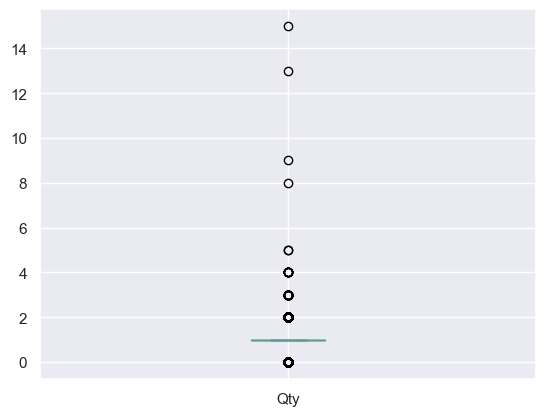

In [14]:
df["Qty"].plot(kind="box")

<Axes: >

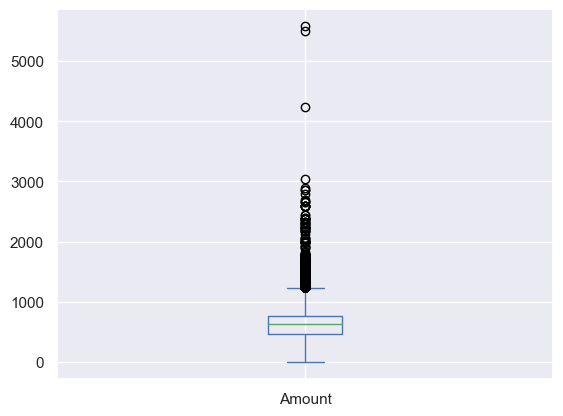

In [15]:
df["Amount"].plot(kind="box")

<Axes: xlabel='currency', ylabel='count'>

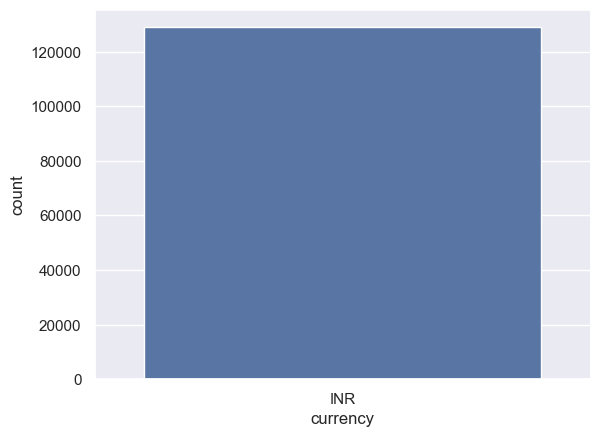

In [16]:
sns.countplot(x="currency", data=df)

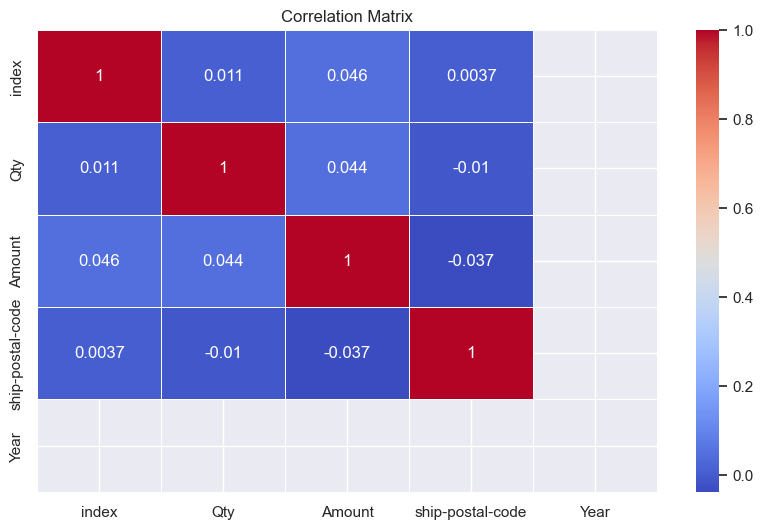

In [64]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
df["ship-city"].nunique()

8955

# -----------------------------------------------------------------------------------------------------------

# *Sales & Revenue Analysis*

## * What are the total sales and revenue generated over time?

In [18]:
# Total Sales

total_sales= df["Amount"].sum()
print("Total Sales:",total_sales)

Total Sales: 83648214.91782884


## * How do sales trends vary across different months, quarters, or years?

In [19]:
# Extract year, quarter, and month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Month'] = df['Date'].dt.to_period('M')

# Aggregate sales amount by year, quarter, and month
sales_by_year = df.groupby('Year')['Amount'].sum()
sales_by_quarter = df.groupby('Quarter')['Amount'].sum()
sales_by_month = df.groupby('Month')['Amount'].sum()


In [20]:
sales_by_year

Year
2022    8.364821e+07
Name: Amount, dtype: float64

In [21]:
sales_by_quarter

Quarter
2022Q1    1.075209e+05
2022Q2    8.354069e+07
Freq: Q-DEC, Name: Amount, dtype: float64

In [22]:
sales_by_month

Month
2022-03    1.075209e+05
2022-04    3.078374e+07
2022-05    2.785047e+07
2022-06    2.490648e+07
Freq: M, Name: Amount, dtype: float64

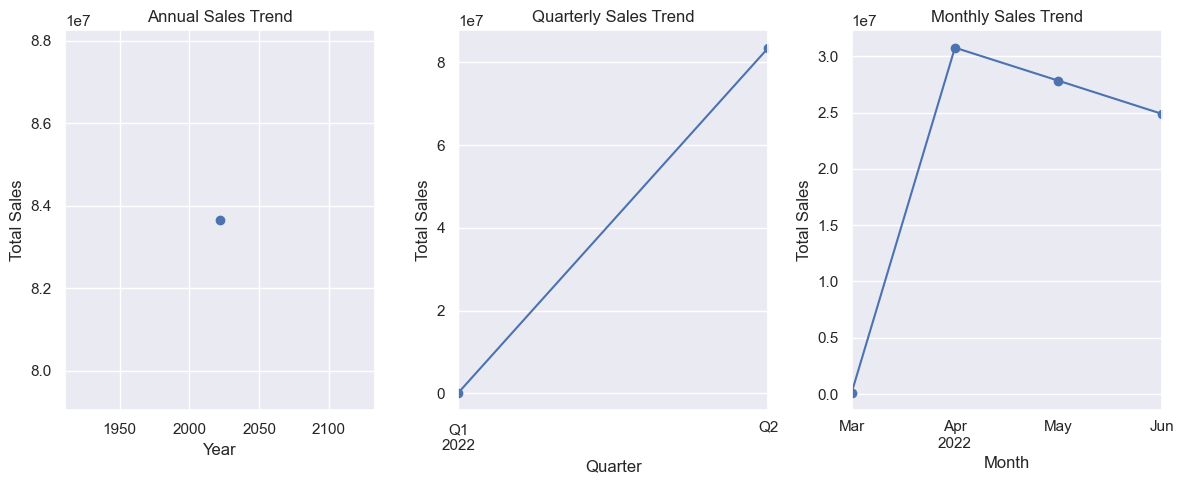

In [23]:
# Plot trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sales_by_year.plot(kind='line', marker='o')
plt.title('Annual Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
sales_by_quarter.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 3)
sales_by_month.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

##  * Which product categories contribute the most revenue?

In [24]:
# Grouping Categories and revenue generated by them
category_revenue=df.groupby("Category")["Amount"].sum().reset_index()

# Sorting revenue in descending order
category_revenue= category_revenue.sort_values(by="Amount", ascending=False)

print(category_revenue)

        Category        Amount
5            Set  4.130676e+07
8          kurta  2.334900e+07
7  Western Dress  1.173233e+07
6            Top  5.644185e+06
3   Ethnic Dress  8.340227e+05
0         Blouse  4.875934e+05
1         Bottom  1.636392e+05
4          Saree  1.297708e+05
2        Dupatta  9.150000e+02


<Axes: title={'center': 'Revenue By Category'}, xlabel='Amount', ylabel='Category'>

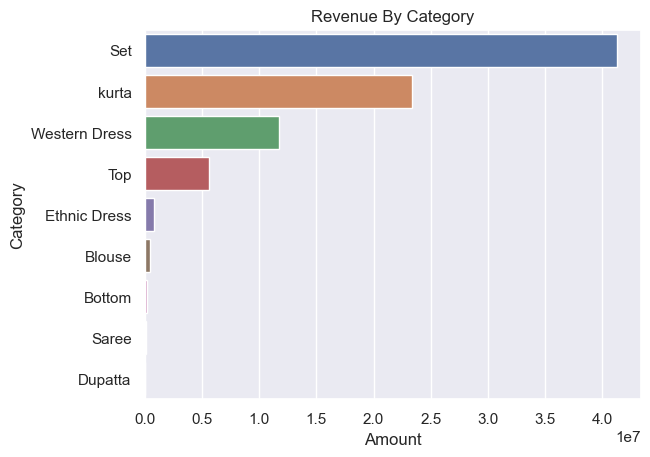

In [25]:
plt.title('Revenue By Category')
sns.barplot(x="Amount",y="Category",data=category_revenue)

##  * What is the average order value (AOV) across different sales channels?

In [26]:
df["Sales Channel "].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [27]:
# Calculate Average Order Value (AOV) across sales channels

aov_by_channel = df.groupby('Sales Channel ').apply(lambda x: x['Amount'].sum() / x['Qty'].sum())

In [28]:
print("Average Order Value (AOV) by Sales Channel:")
aov_by_channel

Average Order Value (AOV) by Sales Channel:


Sales Channel 
Amazon.in     717.430962
Non-Amazon    481.566597
dtype: float64

# -----------------------------------------------------------------------------------------------------------

# *Customer & Geographic Insights*


## * Which states or cities have the highest number of orders?

In [29]:
#Highest orders by city

city_order= df.groupby("ship-city")["Qty"].sum().reset_index()

city_order=city_order.sort_values(by="Qty", ascending=False)

city_order

,ship-city,Qty
776,BENGALURU,10450
2906,HYDERABAD,7333
4795,MUMBAI,5650
5393,NEW DELHI,5252
1466,CHENNAI,4937
...,...,...
8560,bindki Fatehpur,0
737,BATIKA,0
2624,GURUGram,0
2616,GURMATKAL,0


In [30]:
#Highest orders by state

state_order= df.groupby("ship-state")["Qty"].sum().reset_index()

state_order=state_order.sort_values(by="Qty", ascending=False)

state_order

,ship-state,Qty
28,MAHARASHTRA,20356
23,KARNATAKA,15901
56,TAMIL NADU,10412
57,TELANGANA,10253
59,UTTAR PRADESH,9499
...,...,...
37,Nagaland,1
3,AR,1
68,rajsthan,1
33,Meghalaya,0


## * Are there specific locations where cancellations are more frequent?

In [31]:
cancelled_orders= df[df["Status"]== "Cancelled"]

cancelled_orders_city= cancelled_orders.groupby("ship-city")["Qty"].sum().reset_index()

cancelled_orders_city=cancelled_orders_city.sort_values(by="Qty", ascending=False)

cancelled_orders_city

,ship-city,Qty
284,BENGALURU,489
1015,HYDERABAD,387
1674,MUMBAI,270
510,CHENNAI,244
1862,NEW DELHI,225
...,...,...
1266,KEWALPUR bahraich,0
1261,KAWARDHA,0
1260,KAVERIPATTINAM,0
1259,KAVALI,0


In [32]:
cancelled_orders= df[df["Status"]== "Cancelled"]

cancelled_orders_state= cancelled_orders.groupby("ship-state")["Qty"].sum().reset_index()

cancelled_orders_state=cancelled_orders_state.sort_values(by="Qty", ascending=False)

cancelled_orders_state

,ship-state,Qty
26,MAHARASHTRA,1009
21,KARNATAKA,770
43,TELANGANA,524
42,TAMIL NADU,473
45,UTTAR PRADESH,433
22,KERALA,388
1,ANDHRA PRADESH,267
12,DELHI,255
47,WEST BENGAL,227
16,Gujarat,201


## * What percentage of sales come from B2B vs. B2C customers?

In [33]:

B2B_orders= df[df["B2B"]== True]['Amount'].sum()
B2C_orders= df[df["B2B"]== False]['Amount'].sum()

total_sales = B2B_orders + B2C_orders
b2b_percentage = (B2B_orders / total_sales) * 100
b2c_percentage = (B2C_orders / total_sales) * 100

print("B2B Percentage:",b2b_percentage)
print("B2C Percentage:",b2c_percentage)


B2B Percentage: 0.7285039036541168
B2C Percentage: 99.27149609634589


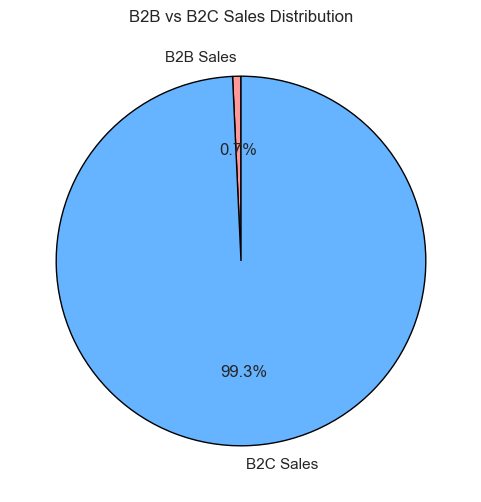

In [34]:
# Visual Representation

labels = ['B2B Sales', 'B2C Sales']
sizes = [b2b_percentage, b2c_percentage]
colors = ['#ff9999','#66b3ff']mer

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('B2B vs B2C Sales Distribution')
plt.show()

# -----------------------------------------------------------------------------------------------------------

# Orders Fulfilled and Orders Cancelled

## * What percentage of orders are fulfilled by amazon vs merchants

In [39]:
merchant_fulfilled= df[df["Fulfilment"]== "Merchant"]['Amount'].sum()
amazon_fulfilled= df[df["Fulfilment"]== "Amazon"]['Amount'].sum()

total_orders= merchant_fulfilled + amazon_fulfilled

merchant_pct= (merchant_fulfilled/total_orders)*100
amazon_pct= (amazon_fulfilled/total_orders)*100

print("Proportion of order fulfilled by Merchant:",merchant_pct)
print("Proportion of order fulfilled by Amazon:",amazon_pct)

Proportion of order fulfilled by Merchant: 30.360994586407873
Proportion of order fulfilled by Amazon: 69.63900541359212


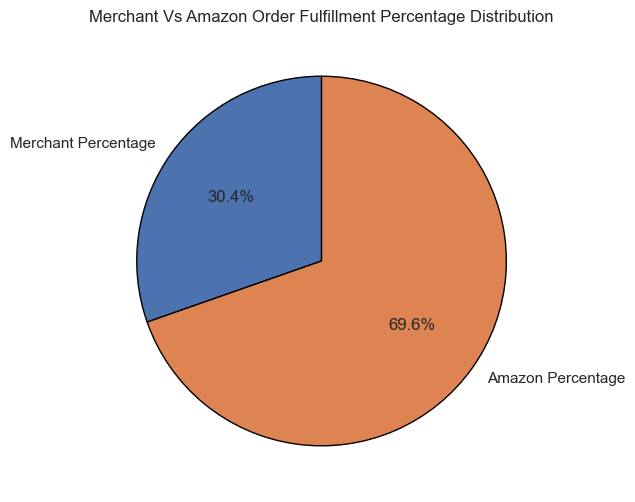

In [42]:
# Visual Representation

labels = ['Merchant Percentage', 'Amazon Percentage']
sizes = [merchant_pct, amazon_pct]

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Merchant Vs Amazon Order Fulfillment Percentage Distribution')
plt.show()

## * What percentage of orders are cancelled vs shipped


shipped_orders= df[df["Status"]== "Shipped"]['Qty'].sum()

total_orders= cancelled_orders + shipped_orders

cancelled_pct= (cancelled_orders/total_orders)*100
shipped_pct= (shipped_orders/total_orders)*100

print("Percentage of orders cancelled:",cancelled_pct)
print("Percentage of orders shipped:",shipped_pct)

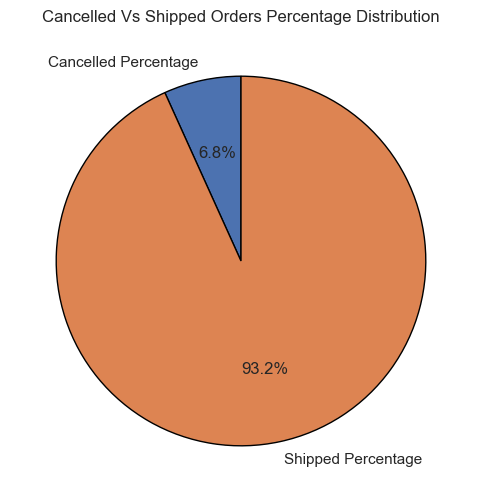

In [51]:
# Visual Representation

labels = ['Cancelled Percentage', 'Shipped Percentage']
sizes = [cancelled_pct, shipped_pct]

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Cancelled Vs Shipped Orders Percentage Distribution')
plt.show()

## * Which product categories have the highest cancellation rates?

In [58]:
cancelled_orders= df[df["Status"]== "Cancelled"]

cancelled_orders= cancelled_orders.groupby("Category")["Qty"].sum().reset_index()
cancelled_orders=cancelled_orders.sort_values(by="Qty", ascending=False)
cancelled_orders

,Category,Qty
4,Set,2256
7,kurta,2253
5,Top,535
6,Western Dress,525
2,Ethnic Dress,37
0,Blouse,32
1,Bottom,14
3,Saree,5
